# Introduction to Machine Learning
---
Written by Liam Thorne for SWiCS & WiE Python Data-Analysis Sessions (2023)

## Overview

Machine learning is the use of numerical models to analyse data, identify patterns and predict new data based on these learned patterns. In this way, machine learning models simulate functions of the real world.

Machine learning models vary greatly in the way they work, the data they use and the way that they learn but the fundamental requirements for training any machine learning model are:

1. A model with parameters to update
2. An objective function
3. Training samples

The model is a mathematical structure for which parameters are updated to fit the training data. An objective function indicates the error between the value the model predicted and the correct value. Training samples define the problem being trained on and are used to update the model parameters.

Although there are many variations of model class; too many to cover in this notebook. The two common archetypes which most models fit into are regression and classification.

## Regression

A regression problem is one where a continuous value is predicted. In the previous notebook, we covered linear regression which is arguable one of the simplest machine learning algorithms. Based on the data $X$, we found the optimal parameters $m$ and $c$ for the function $y = mx + c$ such that we minimised the root mean square error (RMSE):

$$
RMSE(m, c) = \sum^{n}_{i=1}(y_i - (mx_i + c))^2
$$

Our model was Linear Regression, our objective function was RMSE and our training data was olympic world record times.

## Question 1 - Linear Regression



## Classification

Classification predicts a single, predefined class from input data e.g. is this picture a dog or a cat? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## Neural Networks

The majority of models today are deep neural networks instead of the statistical models we have covered so far. Neural networks are collections of simple mathematical operators (neurons) in layers which learn to capture complex relationships. A is simply an addition of some values and their corersponding weights and a bias value. The weights are the gradient of the function and the bias is the intercept.

$$
\sum_{i}x_iw_i + b
$$

The neuron, on its own, doesn't produce a meaningful output so an `activation function` is used to give the output meaning. There are many activation functions but `sigmoid` is the building block of potentially the simplest neural network - logistic regression. Confusingly logistic regression is a `binary classification` algorithm - given the name regression because of it's mathematical similarity to linear regression.

The rest of this notebook will walk through setting up a single layer logistic regression network for binary classification.

<img src=https://deeplearningmath.org/images/logistic_regression_neurone_new.png>

(image from [here](https://deeplearningmath.org/logistic-regression-type-neural-networks.html))

## Question 1 - Generating Training Data

To train our model, we are going to need data. We could go and find a dataset to train on or we can generate some synthetic training data. 

i) Generate 500 training samples use [sklearn.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) with two informative features, no redundant features and 1 cluster per class.

ii) Plot the training samples on a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

iii) Play with the `random_state` parameter of `make_classification` until you get two fairly separate clusters.

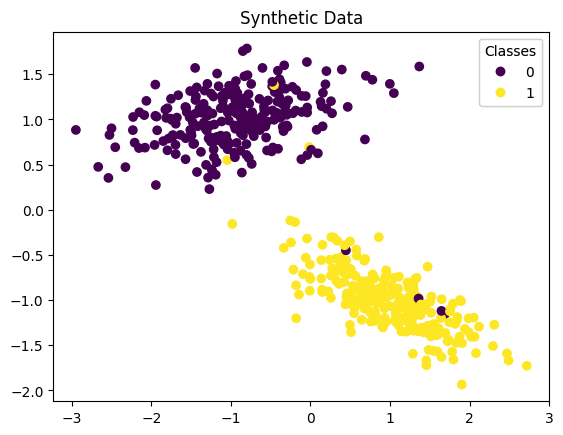

In [7]:
# Answer Here
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=100)

fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], marker='o', c=y)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title("Synthetic Data")

plt.show()

## Question 2 - Design Matrix

A feature vector describes the value of each parameter for a single data point $x_i$. For example, if a person is categoriesed by age and height (cm), their feature vector may look like $x_1 = \begin{bmatrix} 46 \\ 167 \end{bmatrix}$. A design matrix is a collection of feature vectors in a single matrix. When processing this data, we can include the bias value $b$ (sometimes labelled $w_0$) in the matrix multiplication by appending a 1 to every feature vector. This not only simplifies the code but also improves computational efficiency. The multiplication of the weights with the input is usually assigned to $z$.

$$
z = Xw =
\begin{bmatrix}
1 & x_{1, 1} & \cdots & x_{1, m} \\
\vdots & \vdots & & \vdots \\
1 & x_{1, m} & \cdots & x_{n, m}
\end{bmatrix}

\cdot

\begin{bmatrix}
b \\
w_1 \\
\vdots \\
w_m
\end{bmatrix}
$$

There are many ways to initialise your weights but setting them all to 0 or setting them all to random numbers are among the most common.

i) Turn the training samples, defined in the previous question, into a design matrix called `X`.

ii) Randomly initialise a weights vector with the same number of elements as each transformed feature vector. Call this `w`.

In [8]:
np.random.seed(42)

# Answer Here
X = np.hstack([np.ones((X.shape[0], 1)), X])
w = np.random.randn(X.shape[1])

## Question 3 - Sigmoid

After the value at a neuron has been calculated, an activation function is used to determine whether the the neuron is active. In logistic regression, sigmoid $\sigma(z)$ is the activation function. Sigmoid normalises the output of the preceding neuron to be between 0 and 1, converting it into a probability. During inference, we consider any values larger than 0.5 to be active, and lower than 0.5 inactive. i.e.

$$
\text{decision}(x) =
\begin{cases}
1 & P(y=1|x) > 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

i) Define a function named `sigmoid` with one parameter `z`, impelmenting the following mathematical function.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

ii) Plot the function using matplotlib. 

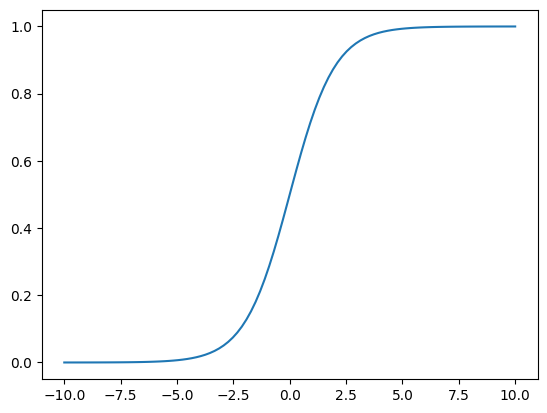

In [3]:
# Answer Here
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

## Question 2 - Logistic Loss

The objective function we used for linear regression was root mean square error (RMSE). We can use RMSE for linear regression because the error function produced by the model forms a convex curve, meaning a single minimum exists (singly point where $\frac{dy}{dx} = 0$). For logistic regression, the error function can produce many minima (local minimum) so optimising the function isn't guarenteed to find the global minimum.


<img src=https://editor.analyticsvidhya.com/uploads/46591Capture5.PNG height=300/>
<img src=https://editor.analyticsvidhya.com/uploads/13012download.jpg height=300 />

(Images from [here](https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/))

Instead, the objective function used by logistic regression is logistic loss, also known as `binary cross entropy loss`. This is a prediction of how close the predicted probability is to the actual value (0 or 1). The loss is higher when the predicted probability is further away from the actual value.

Logistic regression works on the idea of log odds (logit).

$$
log(\frac{\text{Prob. of desired outcome}}{\text{Prob. of undesired outcome}}) = log(\frac{p(x)}{1 - p(x)})
$$


`Note:` log used in this notation is the natural logarithm. The following is the logistic loss function. Most versions don't include $\epsilon$ as it is not required in theory but practically we need it for implementing it in python. We add an epsilon value to prevent $log(0)$ which would cause a divide by 0 error:

$$
J(\theta) = - \frac{1}{N} \sum^{N}_{i=1} y_i log(P(y_i) + \epsilon) + (1 - y_i) log(1 - P(y_i) + \epsilon)
$$

i) Define a function called `logit_loss` loss with parameters `y_hat`, `y` and a default parameter of `epsilon = 1e-13` that implements the logistic loss function. `HINT:` remember that `P(y)` is our predicted probabilities, usually denoted by $\hat{y}$.

ii) Define a test NumPy array `a` with 10 values in range -5 to 4. Define a second array called `b` with 10 values, randomly chosesn to be 0 or 1.

iii) Find the logit loss of `a` against `b`. You should get a single value output.

In [5]:
## MOVE THIS QUESTION
np.random.seed(42)

# Answer Here
def logit_loss(y_hat, y, epsilon=1e-13):
    return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

a = sigmoid(np.arange(-5, 5))
b = np.random.randint(2, size=10)

print(a, b)
print(logit_loss(a, b))

[0.00669285 0.01798621 0.04742587 0.11920292 0.26894142 0.5
 0.73105858 0.88079708 0.95257413 0.98201379] [0 1 0 0 0 1 0 0 0 1]
1.171371648514492


## Question 5 - Forward Pass

The training of a neural network is split into two parts: forward pass and backpropagation. The forward pass takes the inputs and produces its predictions. This is what is happening during inference time when the model is being used. To update the model, the error between the predicted values and the actual values is calculated and then propagated back through the parameters $\theta$ of the model i.e. weights $w$ and biases $b$.

In the forward pass, the input is multiplied with the weight vector of the first layer. This is then fed to the first layer's activation function. If there is another layer, this output is fed to the next layer's weights and then the next layer's activation function etc. In our case, we only have one layer so the final output is the actvation function of layer 1.

i) Define a function called `forward` which accepts parameters `X` and `w`. Multiply the design matrix by the weights and apply the activation function and return the output

In [ ]:
# Answer Here
def forward(X, w):
    z = X @ w
    y_hat = sigmoid(z)
    return y_hat

## Gradient Descent

Often in machine learning, we deal with much more data than can be fit into memory in one go. This means, even if an exact solution can be theoretically evaluated, we cannot practically perform the calculation; as is often the case with logistic regression. 

In [25]:
def gradient_descent(X, y, w, lr=0.01, epochs=1000):
    losses = []
    for epoch in range(epochs):
        z = X @ w
        loss = logit_loss(z, y)
        losses.append(loss)
        w = w - lr * (X.T @ (sigmoid(z) - y))
    return w, losses

w, losses = gradient_descent(X, y, w)
w

array([ 0.13994627,  0.38792876, -4.35243262])

## Boundary

$$
f(x) = - \frac{w_1x + b}{w_2}
$$

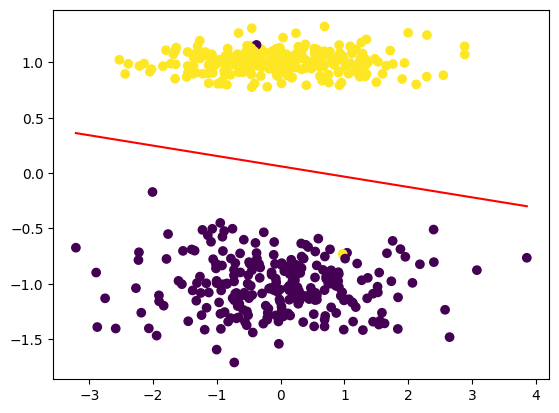

In [131]:
bias = w[0]
weights = w[1:]

fig, ax = plt.subplots()
x_space = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
f_x = -(weights[0] * x_space + bias) / weights[1]

plt.scatter(X[:, 1], X[:, 2], marker='o', c=y)
plt.plot(x_space, f_x, color='red')
plt.show()

In [79]:
def predict(X, w):
    return np.round(sigmoid(X @ w))

x_test = np.array([[1, 1], [-1, 0], [0, 3]])
y_pred = predict(x_test, w)
y_pred

array([1., 0., 1.])

In [ ]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

def cross_entropy_loss(z, y, epsilon=1e-13):
    return -np.mean(y * np.log(softmax(z) + epsilon))